# DATA55000 - Final Project:
    Lewis, 2021 Summer 2
    Mathew Golf
    mathewggolf@lewisu.edu

In [13]:
# Import packages
%matplotlib inline
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [14]:
# Import the dataset - able to switch dependent on which dataset is approbed (posted discussion for this)
mushrooms = pd.read_csv("C:/Users/Mathe/Desktop/mushrooms.csv")
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [15]:
mushrooms.shape

# Mushroom Classification Dataset from Kaggle: 
# https://www.kaggle.com/uciml/mushroom-classification
# this dataset has 8124 samples and 23 features

(8124, 23)

In [16]:
mushrooms.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [17]:
mushrooms.isnull().sum
# check for any NA entries to remove

<bound method NDFrame._add_numeric_operations.<locals>.sum of       class  cap-shape  cap-surface  cap-color  bruises   odor  \
0     False      False        False      False    False  False   
1     False      False        False      False    False  False   
2     False      False        False      False    False  False   
3     False      False        False      False    False  False   
4     False      False        False      False    False  False   
...     ...        ...          ...        ...      ...    ...   
8119  False      False        False      False    False  False   
8120  False      False        False      False    False  False   
8121  False      False        False      False    False  False   
8122  False      False        False      False    False  False   
8123  False      False        False      False    False  False   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0               False         False      False       False  ...   
1          

In [18]:
# Lets explore
from sklearn.preprocessing import LabelEncoder
def label_encoded(feat):
    le=LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)
for col in mushrooms.columns:
    mushrooms[str(col)] = label_encoded(mushrooms[str(col)])

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [19]:
for col in mushrooms.columns:
    mushrooms[str(col)] = label_encoded(mushrooms[str(col)])
# for reference to see the encodings

class [0 1]
cap-shape [0 1 2 3 4 5]
cap-surface [0 1 2 3]
cap-color [0 1 2 3 4 5 6 7 8 9]
bruises [0 1]
odor [0 1 2 3 4 5 6 7 8]
gill-attachment [0 1]
gill-spacing [0 1]
gill-size [0 1]
gill-color [ 0  1  2  3  4  5  6  7  8  9 10 11]
stalk-shape [0 1]
stalk-root [0 1 2 3 4]
stalk-surface-above-ring [0 1 2 3]
stalk-surface-below-ring [0 1 2 3]
stalk-color-above-ring [0 1 2 3 4 5 6 7 8]
stalk-color-below-ring [0 1 2 3 4 5 6 7 8]
veil-type [0]
veil-color [0 1 2 3]
ring-number [0 1 2]
ring-type [0 1 2 3 4]
spore-print-color [0 1 2 3 4 5 6 7 8]
population [0 1 2 3 4 5]
habitat [0 1 2 3 4 5 6]


<AxesSubplot:>

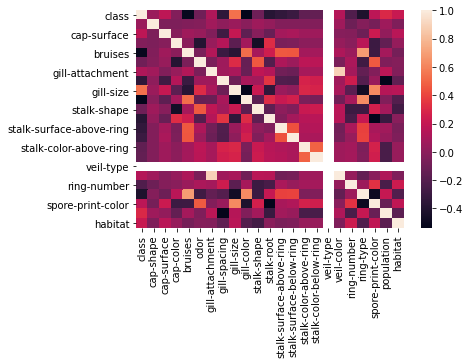

In [20]:
import seaborn as sns
corr=mushrooms.corr()
sns.heatmap(corr)

In [21]:
# remove veil-type as its only 1 value
mushrooms = mushrooms.drop('veil-type', axis=1)

<AxesSubplot:>

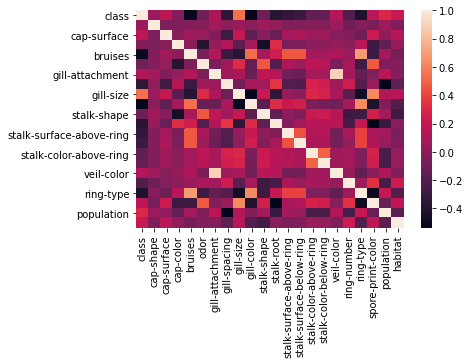

In [22]:
corr=mushrooms.corr()
sns.heatmap(corr)

In [23]:
# Split the dataset into Training and Testing:
X = mushrooms.drop('class', axis=1)
y = mushrooms['class']

X_train, X_test, y_train, y_test =train_test_split(
    X, y, test_size=0.2, random_state=9)

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

In [24]:
# Run Contrasting Techniques
# Technique 1 - Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(units=64, input_shape=[X_train_scaled.shape[1]], activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

sgd = SGD(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=sgd)

model.fit(X_train, y_train,batch_size=5, epochs=20)

Epoch 1/20
1300/1300 [==============================] - 1s 516us/step - loss: 0.1531
Epoch 2/20
1300/1300 [==============================] - 1s 500us/step - loss: 0.1087
Epoch 3/20
1300/1300 [==============================] - 1s 564us/step - loss: 0.0956
Epoch 4/20
1300/1300 [==============================] - 1s 574us/step - loss: 0.0868 0s - los
Epoch 5/20
1300/1300 [==============================] - 1s 499us/step - loss: 0.0799
Epoch 6/20
1300/1300 [==============================] - 1s 487us/step - loss: 0.0745
Epoch 7/20
1300/1300 [==============================] - 1s 503us/step - loss: 0.0704
Epoch 8/20
1300/1300 [==============================] - 1s 535us/step - loss: 0.0667
Epoch 9/20
1300/1300 [==============================] - 1s 516us/step - loss: 0.0634
Epoch 10/20
1300/1300 [==============================] - 1s 562us/step - loss: 0.0603
Epoch 11/20
1300/1300 [==============================] - 1s 502us/step - loss: 0.0574
Epoch 12/20
1300/1300 [==============================]

In [25]:
# Technique 1 - Confusion Matrix
from sklearn.metrics import accuracy_score,confusion_matrix

pred=model.predict(X_test)
pred=pred>0.5
confusion_matrix(y_test,pred)

array([[852,  23],
       [ 35, 715]], dtype=int64)

In [26]:
# Technique 1 - Precision Score
# Precision = TP / (FP + TP)
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: %.3f' %
     precision_score(y_test, pred))

Precision: 0.969


In [27]:
# Technique 1 - Recall Score
# Recall = TP / (FN + TP)
print('Recall: %.3f' %
     recall_score(y_test, pred))

Recall: 0.953


In [28]:
# Technique 1 - Accuracy
# Accuracy = (TP + TN) / (TP + FN + TN + FP)
print('Accuracy: %.3f' %
     accuracy_score(y_test, pred))

Accuracy: 0.964


In [29]:
# Technique 1 - F1 Score
# F1 Score = [2*(precision * recall)] / (precision + recall)
print('F1 Score: %.3f' %
     f1_score(y_test, pred))

F1 Score: 0.961


In [30]:
############################################################################################################################

In [31]:
# Technique 2 - Random Forest Classifier (Regression)
# Split the dataset into Training and Testing:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

X2 = mushrooms.drop(['class'],axis=1)
y2 = mushrooms['class']

categorical_cols_X2 = [cname for cname in X2.columns if 
                    X2[cname].dtype == "object"]
good_label_cols = ['class']

label_y2_train = mushrooms.drop(categorical_cols_X2, axis=1)
ordinal_encoder = OrdinalEncoder()
label_y2_train[good_label_cols] = ordinal_encoder.fit_transform(mushrooms[good_label_cols])

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,label_y2_train,train_size=0.8, test_size=0.2,random_state=0)

label_X2_train = X2_train
label_X2_test = X2_test
label_X2_train[categorical_cols_X2] = ordinal_encoder.fit_transform(X2_train[categorical_cols_X2])
label_X2_test[categorical_cols_X2] = ordinal_encoder.transform(X2_test[categorical_cols_X2])

<ipython-input-31-00f3f1387634>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_X2_train[categorical_cols_X2] = ordinal_encoder.fit_transform(X2_train[categorical_cols_X2])
<ipython-input-31-00f3f1387634>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_X2_test[categorical_cols_X2] = ordinal_encoder.transform(X2_test[categorical_cols_X2])


In [32]:
# Technique 2 and its Mean Absolute Error
model2 = RandomForestClassifier()
model2.fit(label_X2_train, y2_train)
pred2 = model2.predict(label_X2_test)
print(mean_absolute_error(y2_test, pred2))

0.0033006993006993003
